# Heart Disease Prediction

In [1]:
# Use for linear algebra
import numpy as np 

# Use for data processing
import pandas as pd 

# Create figure and plot
import matplotlib.pyplot as plt

# Make statistical graphical
import seaborn as sns

# Draw Nice Graph
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.offline as po

# Load Data Set

In [2]:
df=pd.read_csv("./heart.csv")

In [3]:
# Styled Table in Plotly

fig = go.Figure(data=[go.Table(header=dict(values=list(df.columns), # Header values
                                           line_color='black', # Line Color of header
                                           fill_color='slateblue', # background color of header
                                           align='center', # Align header at center
                                           height=40, # Height of Header
                                           font=dict(color='white', size=12), # Font size & color of header text
                                           ),
                                            cells=dict(values=[
                                                df.age , # Column values
                                                df.sex, 
                                                df.chestpain,
                                                df.restbp, 
                                                df.choles,
                                                df.fastbs,
                                                df.restecg,
                                                df.maxhr,
                                                df.exagina,
                                                df.oldpeak,
                                                df.stslope,
                                                df.target
                                            ],
                                            line_color='darkgrey', # Line color of the cell
                                            fill_color='mintcream', # Color of the cell
                                            align='left'  # Align text to left in cell
                                           )
                               )
                     ]
               )

fig.update_layout(width=1000, height=500)
fig.show()

# Data Analysis (Male: 1, Female: 0; Target (Have Disease): 1, No: 0)

In [4]:
df.head()

age  sex  chestpain  restbp  choles  fastbs  restecg  maxhr  exagina  \
0   40    1          1     140     289       0        0    172        0   
1   37    1          1     130     283       0        1     98        0   
2   54    1          2     150     195       0        0    122        0   
3   39    1          2     120     339       0        0    170        0   
4   45    0          1     130     237       0        0    170        0   

   oldpeak  stslope  target  
0      0.0        0       0  
1      0.0        0       0  
2      0.0        0       0  
3      0.0        0       0  
4      0.0        0       0

In [5]:
df.tail()

age  sex  chestpain  restbp  choles  fastbs  restecg  maxhr  exagina  \
3926   57    0          0     140     241       0        1    123        1   
3927   45    1          3     110     264       0        1    132        0   
3928   68    1          0     144     193       1        1    141        0   
3929   57    1          0     130     131       0        1    115        1   
3930   57    0          1     130     236       0        0    174        0   

      oldpeak  stslope  target  
3926      0.2        1       0  
3927      1.2        1       0  
3928      3.4        1       0  
3929      1.2        1       0  
3930      0.0        1       0

In [6]:
# See Data Types and Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3931 entries, 0 to 3930
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3931 non-null   int64  
 1   sex        3931 non-null   int64  
 2   chestpain  3931 non-null   int64  
 3   restbp     3931 non-null   int64  
 4   choles     3931 non-null   int64  
 5   fastbs     3931 non-null   int64  
 6   restecg    3931 non-null   int64  
 7   maxhr      3931 non-null   int64  
 8   exagina    3931 non-null   int64  
 9   oldpeak    3931 non-null   float64
 10  stslope    3931 non-null   int64  
 11  target     3931 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 368.7 KB


In [7]:
df.describe()

age          sex    chestpain       restbp       choles  \
count  3931.000000  3931.000000  3931.000000  3931.000000  3931.000000   
mean     54.210125     0.717629     1.366573   131.723734   233.413381   
std       9.165491     0.450210     1.167495    17.800206    74.711141   
min      28.000000     0.000000     0.000000     0.000000     0.000000   
25%      47.000000     0.000000     0.000000   120.000000   204.000000   
50%      55.000000     1.000000     1.000000   130.000000   236.000000   
75%      61.000000     1.000000     2.000000   140.000000   274.000000   
max      77.000000     1.000000     3.000000   200.000000   603.000000   

            fastbs      restecg        maxhr      exagina      oldpeak  \
count  3931.000000  3931.000000  3931.000000  3931.000000  3931.000000   
mean      0.172221     0.581023   146.005597     0.352073     1.019639   
std       0.377620     0.659042    24.301886     0.477677     1.144141   
min       0.000000     0.000000    60.000000     0.000000    -2.600000   
25%       0.000000     0.000000   129.000000     0.000000     0.000000   
50%       0.000000     0.000000   150.000000     0.000000     0.800000   
75%       0.000000     1.000000   163.000000     1.000000     1.600000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

           stslope       target  
count  3931.000000  3931.000000  
mean      1.142457     0.524040  
std       0.711273     0.499485  
min       0.000000     0.000000  
25%       1.000000     0.000000  
50%       1.000000     1.000000  
75%       2.000000     1.000000  
max       2.000000     1.000000

In [8]:
#See Data Size
df.shape

(3931, 12)

In [9]:
df.columns

Index(['age', 'sex', 'chestpain', 'restbp', 'choles', 'fastbs', 'restecg',
       'maxhr', 'exagina', 'oldpeak', 'stslope', 'target'],
      dtype='object')

In [10]:
df.isna().sum()

age          0
sex          0
chestpain    0
restbp       0
choles       0
fastbs       0
restecg      0
maxhr        0
exagina      0
oldpeak      0
stslope      0
target       0
dtype: int64

In [11]:
df.corr()

age       sex  chestpain    restbp    choles    fastbs  \
age        1.000000 -0.064548  -0.021610  0.269029  0.082893  0.138343   
sex       -0.064548  1.000000   0.049812 -0.050824 -0.201108  0.064606   
chestpain -0.021610  0.049812   1.000000  0.028763 -0.199055  0.111294   
restbp     0.269029 -0.050824   0.028763  1.000000  0.109356  0.141126   
choles     0.082893 -0.201108  -0.199055  0.109356  1.000000 -0.134411   
fastbs     0.138343  0.064606   0.111294  0.141126 -0.134411  1.000000   
restecg    0.008976 -0.031786   0.089206 -0.022320  0.007177 -0.032056   
maxhr     -0.372692 -0.105954  -0.018305 -0.063115  0.146207 -0.063130   
exagina    0.122293  0.159497  -0.101901  0.090267  0.004776  0.047463   
oldpeak    0.221901  0.086496  -0.077434  0.182057  0.065786  0.012076   
stslope   -0.013687 -0.022148  -0.133072 -0.050893  0.078464 -0.032631   
target    -0.067635 -0.098801   0.382176 -0.056205 -0.136984  0.054266   

            restecg     maxhr   exagina   oldpeak   stslope    target  
age        0.008976 -0.372692  0.122293  0.221901 -0.013687 -0.067635  
sex       -0.031786 -0.105954  0.159497  0.086496 -0.022148 -0.098801  
chestpain  0.089206 -0.018305 -0.101901 -0.077434 -0.133072  0.382176  
restbp    -0.022320 -0.063115  0.090267  0.182057 -0.050893 -0.056205  
choles     0.007177  0.146207  0.004776  0.065786  0.078464 -0.136984  
fastbs    -0.032056 -0.063130  0.047463  0.012076 -0.032631  0.054266  
restecg    1.000000  0.025519 -0.013042  0.013952  0.017168  0.103652  
maxhr      0.025519  1.000000 -0.381264 -0.277590  0.214082  0.128951  
exagina   -0.013042 -0.381264  1.000000  0.324192 -0.068272 -0.130399  
oldpeak    0.013952 -0.277590  0.324192  1.000000 -0.179380 -0.179773  
stslope    0.017168  0.214082 -0.068272 -0.179380  1.000000  0.335578  
target     0.103652  0.128951 -0.130399 -0.179773  0.335578  1.000000

In [12]:
df.skew()

age         -0.226006
sex         -0.967281
chestpain    0.095095
restbp       0.572349
choles      -0.904242
fastbs       1.736909
restecg      0.700505
maxhr       -0.439520
exagina      0.619674
oldpeak      1.192911
stslope     -0.213008
target      -0.096307
dtype: float64

# Data Visualization

# Gender (Male: 1, Female: 0)

In [13]:
colors = px.colors.qualitative.Vivid

fig = make_subplots(rows=1,subplot_titles=('', ''))
                    
fig.add_trace(go.Bar(y = df['sex'].value_counts().values.tolist(), x = ['Male', 'Female'], 
                      text=df['sex'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_yaxes(range=[0,3000])

#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#e5ecf6',
                    plot_bgcolor= '#e5ecf6',
                    title=dict(text = "Gender Distribution (Male=1, Female=0)",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

# Chest Pain Type (ASY: 3, NAP: 2, ATA: 1, TA: 0)

In [14]:
colors = px.colors.qualitative.Vivid

fig = make_subplots(rows=1,subplot_titles=('',''))

fig.add_trace(go.Bar(y = df['chestpain'].value_counts().values.tolist(), x = ['ASY', 'NAP', 'ATA', 'TA'], 
                      text=df['chestpain'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_yaxes(range=[0,1500])

#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#e5ecf6',
                    plot_bgcolor= '#e5ecf6',
                    title=dict(text = "Chest Pain Type (ASY: 3, NAP: 2, ATA: 1, TA: 0)",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

# Resting ECG (Normal: 0, ST: 1, LVH: 2)

In [15]:
colors = px.colors.qualitative.Vivid

fig = make_subplots(rows=1,subplot_titles=('',''))

fig.add_trace(go.Bar(y = df['restecg'].value_counts().values.tolist(), x = ['Normal', 'ST', 'LVH'], 
                      text=df['restecg'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_yaxes(range=[0,2500])

#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#e5ecf6',
                    plot_bgcolor= '#e5ecf6',
                    title=dict(text = "RestingECG Distribution (Normal: 0, ST: 1, LVH: 2)",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

# Fasting Blood Sugar (<= 120mg/dl: 0 (NO), > 120mg/dl: 1 (YES))

In [16]:
colors = px.colors.qualitative.Vivid

fig = make_subplots(rows=1,subplot_titles=('',''))
                    
fig.add_trace(go.Bar(y = df['fastbs'].value_counts().values.tolist(), x = ['No', 'Yes'], 
                      text=df['fastbs'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_yaxes(range=[0,3500])

#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#e5ecf6',
                    plot_bgcolor= '#e5ecf6',
                    title=dict(text = "FastingBS Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

# Exercise Angina (NO: 0, YES: 1)

In [17]:
colors = px.colors.qualitative.Vivid

fig = make_subplots(rows=1,subplot_titles=('',''))

fig.add_trace(go.Bar(y = df['exagina'].value_counts().values.tolist(), x = ['No', 'Yes'], 
                      text=df['exagina'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_yaxes(range=[0,3000])

#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#e5ecf6',
                    plot_bgcolor= '#e5ecf6',
                    title=dict(text = "ExerciseAngina Distribution (NO: 0, YES: 1)",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

# ST_Slope (UP: 0, FLAT: 1, DOWN: 2)

In [18]:
colors = px.colors.qualitative.Vivid

fig = make_subplots(rows=1,subplot_titles=('',''))

fig.add_trace(go.Bar(y = df['stslope'].value_counts().values.tolist(), x = ['Flat', 'Up', 'Down'], 
                      text=df['stslope'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_yaxes(range=[0,2000])

#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#e5ecf6',
                    plot_bgcolor= '#e5ecf6',
                    title=dict(text = "ST_Slope Distribution (UP: 0, FLAT: 1, DOWN: 2)",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

# Heart Disease (No Heart Disease: 0, Have Heart Disease: 1)

In [19]:
colors2 = px.colors.qualitative.Vivid
fig = make_subplots(rows=1,subplot_titles=('',''))

fig.add_trace(go.Bar(y = df['target'].value_counts().values.tolist(), x = ['Heart Disease', 'No Heart Disease'], 
                      text=df['target'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors2,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_yaxes(range=[0,2500])

#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#e5ecf6',
                    plot_bgcolor= '#e5ecf6',
                    title=dict(text = "Heart Disease Distribution (Yes: 1, No: 0)",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

# Corr Graph

In [20]:
# Using facet_row and or facet_col arguments to create Sub plots
# Show Sex, Choles, Fastbs, Age

fig = px.scatter(df, 
                 x=df.age, 
                 y=df.choles, 
                 color=df.target, 
                 facet_col=df.fastbs,
                 facet_row=df.sex,
                 color_discrete_map={1: "#FF5722",0: "#7CB342"},
                 width=950, 
                 height=800,
                 title="Heart Disease Data with (Sex, Choles, Fastbs, Age)")

fig.update_layout(
                    plot_bgcolor= "#dcedc1",
                    paper_bgcolor="#FFFDE7",
                 )


fig.show()

#Use this to store image as offline
#po.plot(fig)

In [21]:
#Use for category for below

cat = ['sex', 'chestpain', 'fastbs', 'restecg', 'exagina', 'stslope', 'target']
num = ['age', 'restbp', 'choles', 'maxhr', 'oldpeak']

# Scatter Plot

Target = Heart Disease (Don't Have: 0, Have: 1)

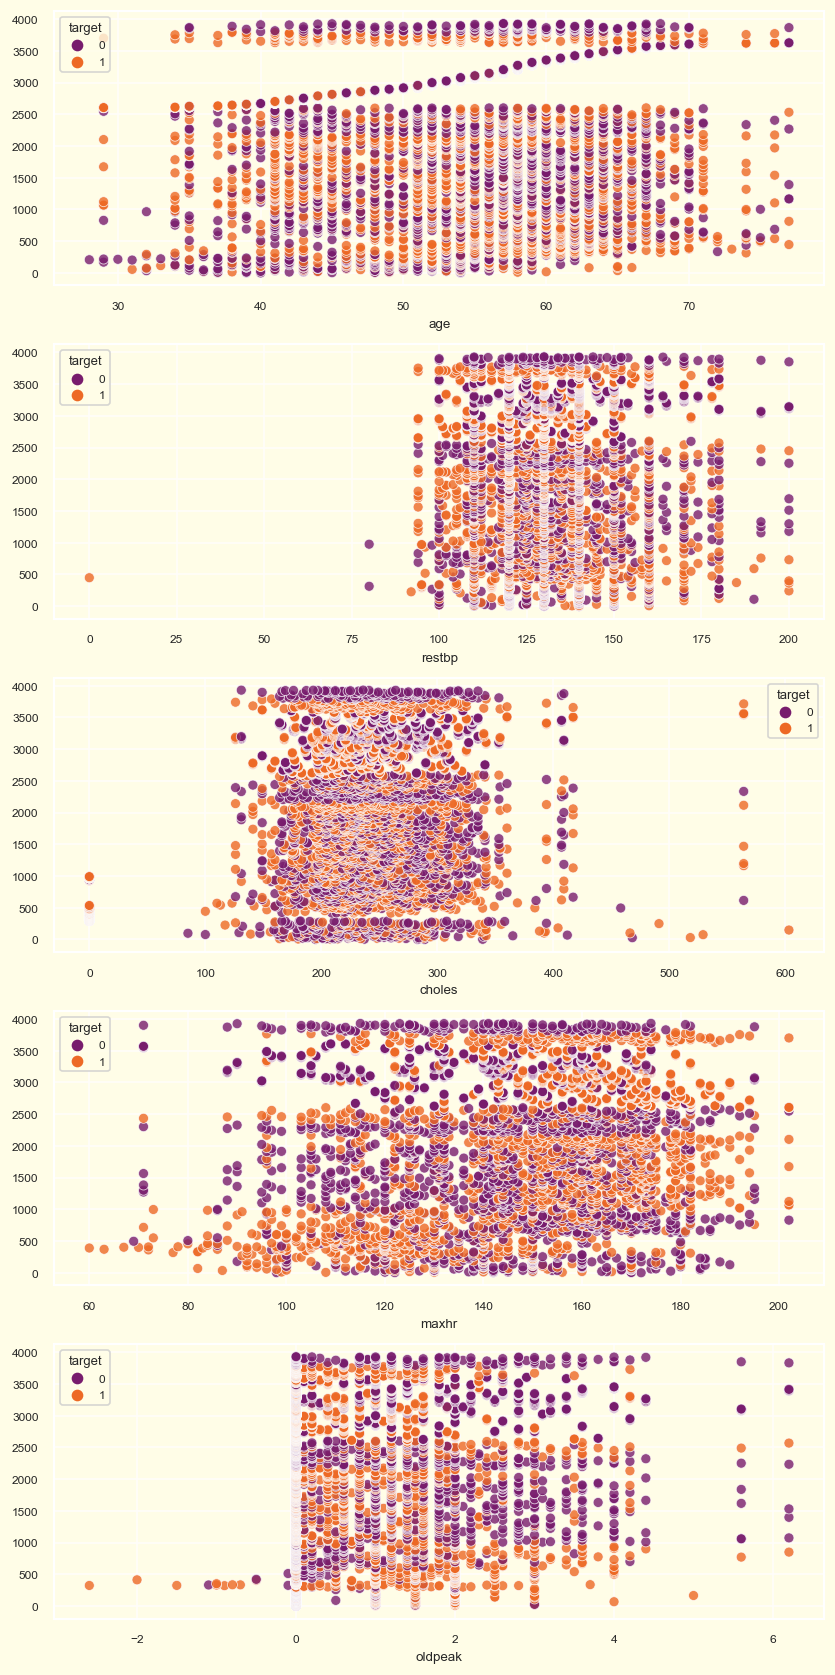

In [22]:
import seaborn as sns
sns.set_theme(rc = {'figure.dpi': 120, 'axes.labelsize': 8, 
                    'axes.facecolor': '#FFFDE7', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#FFFDE7'}, font_scale = 0.65)

fig, ax = plt.subplots(5, 1, figsize = (7, 14))

for indx, (column, axes) in list(enumerate(list(zip(num, ax.flatten())))):
    
    sns.scatterplot(ax = axes, y = df[column].index, x = df[column], 
                    hue = df['target'], palette = 'inferno', alpha = 0.8)
    
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
    
plt.tight_layout()
plt.show()

# Histogram Plot

Target = Heart Disease (Don't Have: 0, Have: 1)

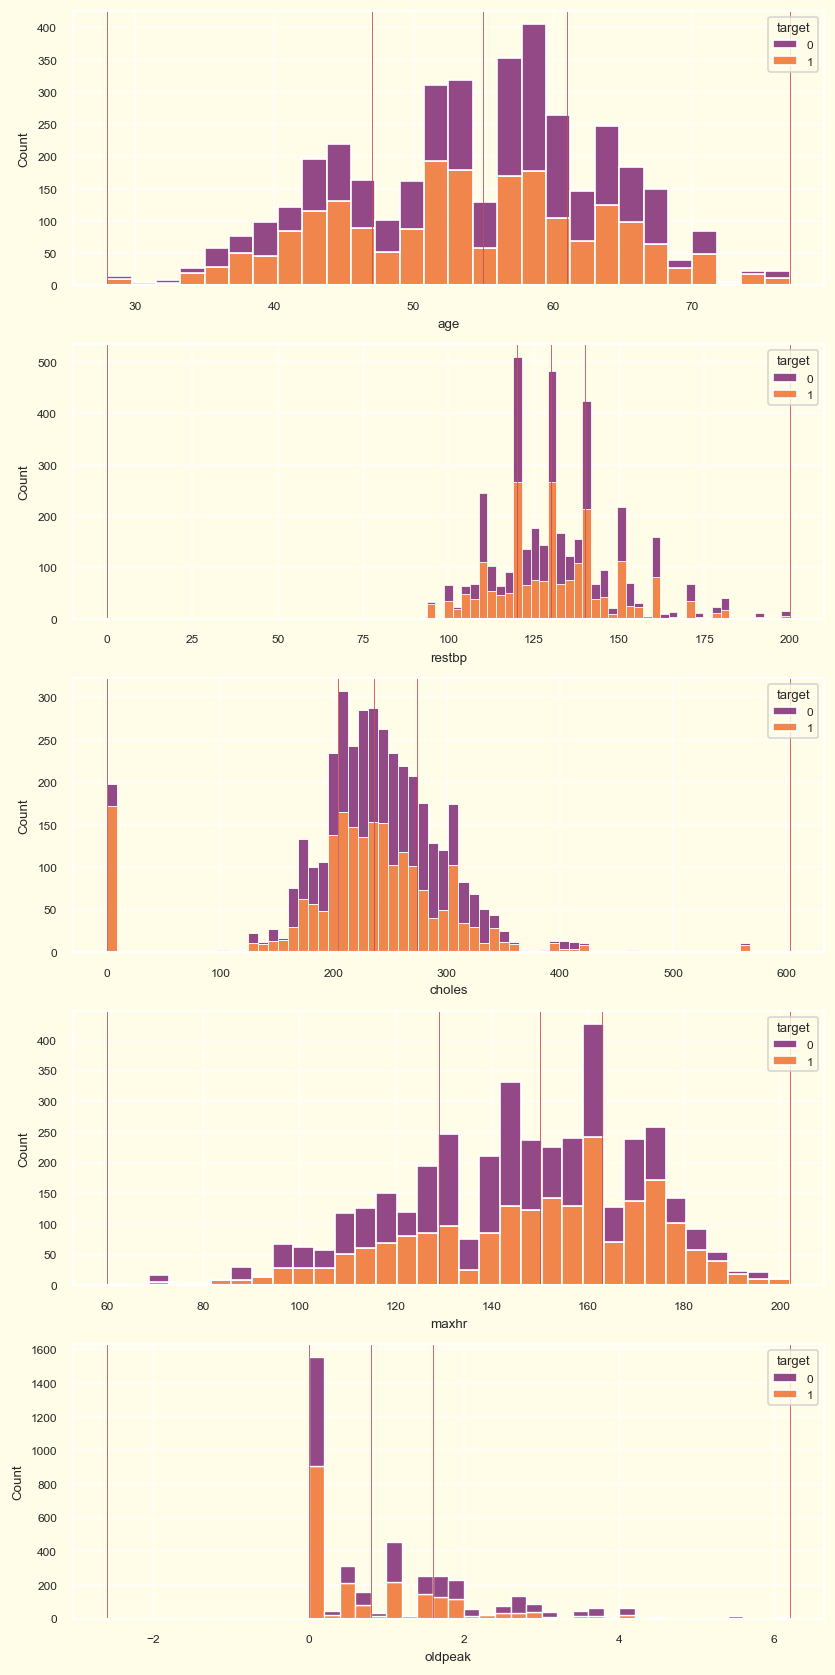

In [23]:
sns.set_theme(rc = {'figure.dpi': 120, 'axes.labelsize': 8, 
                    'axes.facecolor': '#FFFDE7', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#FFFDE7'}, font_scale = 0.65)

fig, ax = plt.subplots(5, 1, figsize = (7, 14))

for indx, (column, axes) in list(enumerate(list(zip(num, ax.flatten())))):
    
    sns.histplot(ax = axes, x = df[column], hue = df['target'], 
                 palette = 'inferno', alpha = 0.8, multiple = 'stack')
    
    legend = axes.get_legend() # sns.hisplot has some issues with legend
    handles = legend.legendHandles
    legend.remove()
    axes.legend(handles, ['0', '1'], title = 'target', loc = 'upper right')
    Quantiles = np.quantile(df[column], [0, 0.25, 0.50, 0.75, 1])
    
    for q in Quantiles: axes.axvline(x = q, linewidth = 0.5, color = 'r')
        
plt.tight_layout()
plt.show()

# Show Average (Mean)

In [24]:
# Check average age (same for both male and female)
df2 = df.groupby('sex').agg({'age' : 'mean', "chestpain":'count','restbp':'mean','choles':'mean',
                            'fastbs':'sum','restecg':'count','maxhr':'mean','exagina':'count','oldpeak':'mean',
                            'stslope':'count','target':'sum'})
df2

age  chestpain      restbp      choles  fastbs  restecg  \
sex                                                                  
0    55.153153       1110  133.165766  257.363063     148     1110   
1    53.839064       2821  131.156328  223.989720     529     2821   

          maxhr  exagina   oldpeak  stslope  target  
sex                                                  
0    150.109910     1110  0.861892     1110     669  
1    144.390642     2821  1.081709     2821    1391

In [25]:
px.bar(data_frame=df2, barmode='group',
       title = "<b>Gender wise Analyzing (Female: 0, Male: 1)</b>",template="plotly_white")

# Check Stat

Age

In [26]:
df.sex.value_counts()

1    2821
0    1110
Name: sex, dtype: int64

With Heart Disease (Target = 1)

In [27]:
df.sex[df.target==1].value_counts()

1    1391
0     669
Name: sex, dtype: int64

Sex With Heart Disease

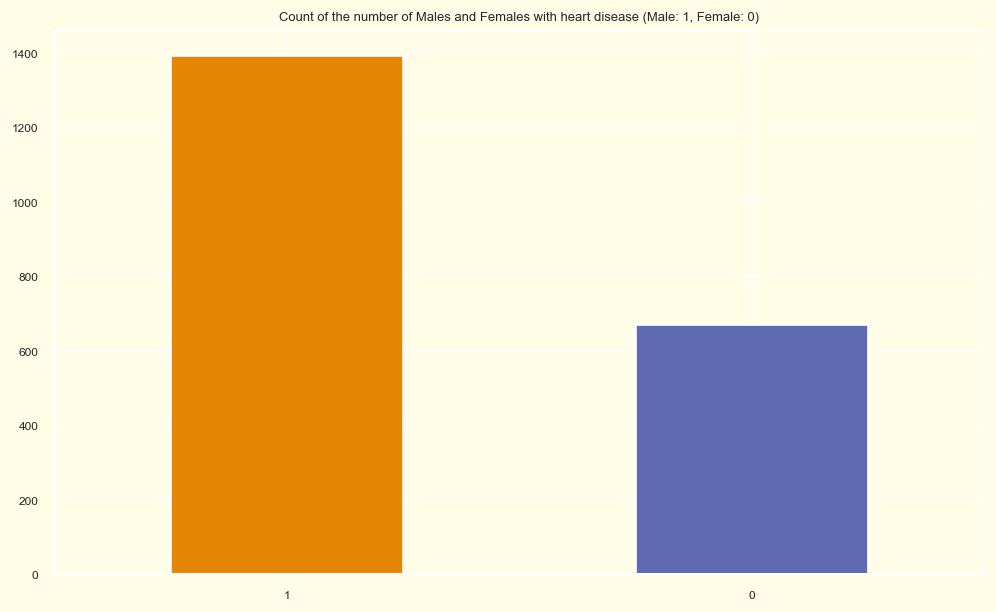

In [28]:
import matplotlib.pyplot as plt

df.sex[df.target==1].value_counts().plot(kind='bar',figsize=(10,6),color=['#e58606','#5d69b1'])

plt.title("Count of the number of Males and Females with heart disease (Male: 1, Female: 0)")
plt.xticks(rotation=0);


Crosstab for Sex With Heart Disease (Male: 1, Female: 0; Heart Disease: 1, No Heart Disease: 0)

In [29]:
pd.crosstab(df.target,df.sex)

sex       0     1
target           
0       441  1430
1       669  1391

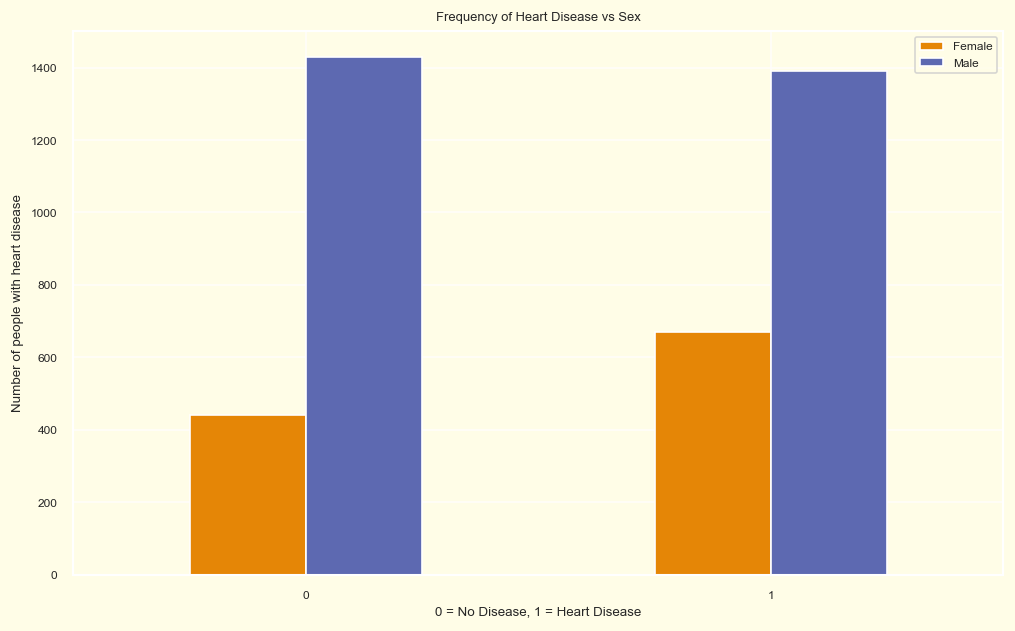

In [30]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=["#e58606","#5d69b1"])
plt.title("Frequency of Heart Disease vs Sex")
plt.xlabel("0 = No Disease, 1 = Heart Disease")
plt.ylabel("Number of people with heart disease")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [31]:
df.corr()

age       sex  chestpain    restbp    choles    fastbs  \
age        1.000000 -0.064548  -0.021610  0.269029  0.082893  0.138343   
sex       -0.064548  1.000000   0.049812 -0.050824 -0.201108  0.064606   
chestpain -0.021610  0.049812   1.000000  0.028763 -0.199055  0.111294   
restbp     0.269029 -0.050824   0.028763  1.000000  0.109356  0.141126   
choles     0.082893 -0.201108  -0.199055  0.109356  1.000000 -0.134411   
fastbs     0.138343  0.064606   0.111294  0.141126 -0.134411  1.000000   
restecg    0.008976 -0.031786   0.089206 -0.022320  0.007177 -0.032056   
maxhr     -0.372692 -0.105954  -0.018305 -0.063115  0.146207 -0.063130   
exagina    0.122293  0.159497  -0.101901  0.090267  0.004776  0.047463   
oldpeak    0.221901  0.086496  -0.077434  0.182057  0.065786  0.012076   
stslope   -0.013687 -0.022148  -0.133072 -0.050893  0.078464 -0.032631   
target    -0.067635 -0.098801   0.382176 -0.056205 -0.136984  0.054266   

            restecg     maxhr   exagina   oldpeak   stslope    target  
age        0.008976 -0.372692  0.122293  0.221901 -0.013687 -0.067635  
sex       -0.031786 -0.105954  0.159497  0.086496 -0.022148 -0.098801  
chestpain  0.089206 -0.018305 -0.101901 -0.077434 -0.133072  0.382176  
restbp    -0.022320 -0.063115  0.090267  0.182057 -0.050893 -0.056205  
choles     0.007177  0.146207  0.004776  0.065786  0.078464 -0.136984  
fastbs    -0.032056 -0.063130  0.047463  0.012076 -0.032631  0.054266  
restecg    1.000000  0.025519 -0.013042  0.013952  0.017168  0.103652  
maxhr      0.025519  1.000000 -0.381264 -0.277590  0.214082  0.128951  
exagina   -0.013042 -0.381264  1.000000  0.324192 -0.068272 -0.130399  
oldpeak    0.013952 -0.277590  0.324192  1.000000 -0.179380 -0.179773  
stslope    0.017168  0.214082 -0.068272 -0.179380  1.000000  0.335578  
target     0.103652  0.128951 -0.130399 -0.179773  0.335578  1.000000

<AxesSubplot:>

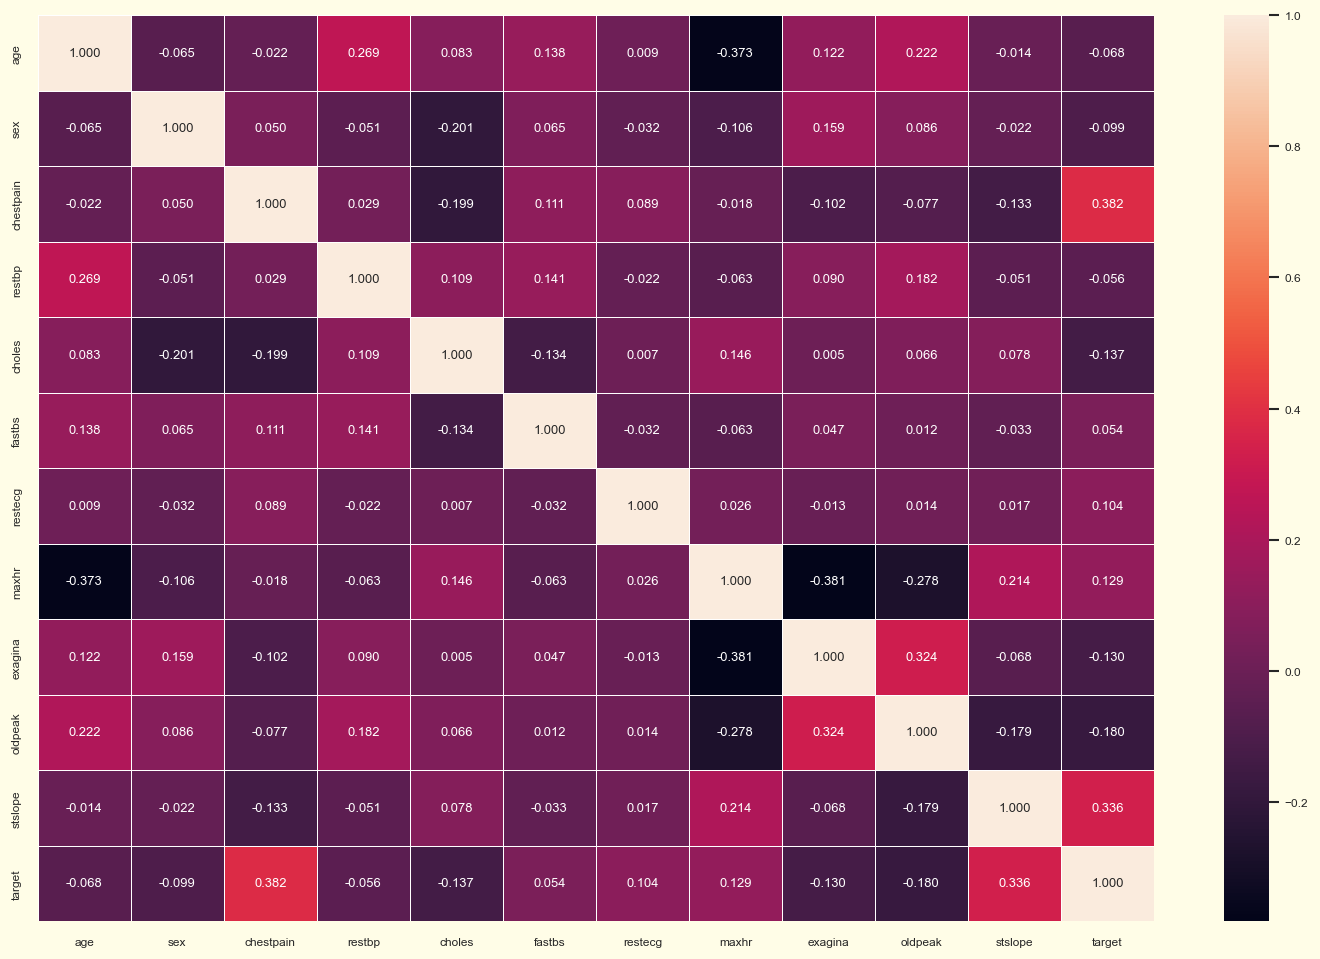

In [32]:
cor_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

# Data Preprocessing

In [33]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
feat=['age', 'sex', 'chestpain', 'restbp', 'choles', 'fastbs', 'restecg', 'maxhr', 'exagina', 'oldpeak', 'stslope']
df[feat] = scal.fit_transform(df[feat])
df.head()

age  sex  chestpain  restbp    choles  fastbs  restecg     maxhr  \
0  0.244898  1.0   0.333333    0.70  0.479270     0.0      0.0  0.788732   
1  0.183673  1.0   0.333333    0.65  0.469320     0.0      0.5  0.267606   
2  0.530612  1.0   0.666667    0.75  0.323383     0.0      0.0  0.436620   
3  0.224490  1.0   0.666667    0.60  0.562189     0.0      0.0  0.774648   
4  0.346939  0.0   0.333333    0.65  0.393035     0.0      0.0  0.774648   

   exagina   oldpeak  stslope  target  
0      0.0  0.295455      0.0       0  
1      0.0  0.295455      0.0       0  
2      0.0  0.295455      0.0       0  
3      0.0  0.295455      0.0       0  
4      0.0  0.295455      0.0       0

# Feature Scaling

In [34]:
X=df.drop("target",axis=1).values
Y=df.target.values

# Feature Selection

Split data into training and testing sets

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Machine Learning

Function For evaluating metrics

In [36]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix

def evaluation(Y_test,Y_pred):
    acc=accuracy_score(Y_test,Y_pred)
    rcl=recall_score(Y_test,Y_pred)
    f1=f1_score(Y_test,Y_pred)
 

    metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               
              }

    return print(metric_dict)

#evaluation(Y_test,SVC_Y_pred)

# Fitting and Comparing Different Models

# KNN

In [37]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=  KNeighborsClassifier(n_neighbors=5)
Knn_clf.fit(X_train,Y_train)
Knn_Y_pred=Knn_clf.predict(X_test)
Knn_score=Knn_clf.score(X_test,Y_test)
#print(Knn_score)
evaluation(Y_test,Knn_Y_pred)

{'accuracy': 0.936, 'recall': 0.945, 'F1 score': 0.94}


# Random Forest

In [38]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
RF_clf=RandomForestClassifier(n_estimators=40)
RF_clf.fit(X_train,Y_train)
RF_score=RF_clf.score(X_test,Y_test)
RF_Y_pred=RF_clf.predict(X_test)
#print(RF_score)
evaluation(Y_test,RF_Y_pred)

{'accuracy': 0.973, 'recall': 0.974, 'F1 score': 0.975}


In [39]:
model_comp = pd.DataFrame({'Model': ['Random Forest','K-Nearest Neighbour'], 'Accuracy': [RF_score*100,Knn_score*100]})
model_comp

Model   Accuracy
0        Random Forest  97.331639
1  K-Nearest Neighbour  93.646760

# Trying Stacking CV Classifier

In [40]:
from mlxtend.classifier import StackingCVClassifier
#Stack the the model
scv=StackingCVClassifier(classifiers=[Knn_clf,RF_clf],meta_classifier= Knn_clf)
scv.fit(X_train,Y_train)
scv_score=scv.score(X_test,Y_test)
scv_Y_pred=scv.predict(X_test)
evaluation(Y_test,scv_Y_pred)

{'accuracy': 0.978, 'recall': 0.983, 'F1 score': 0.98}


In [41]:
model_comp = pd.DataFrame({'Model': ['Random Forest','K-Nearest Neighbour', 'StackingCV Classifier'], 'Accuracy': [RF_score*100,Knn_score*100,scv_score*100]})
model_comp

Model   Accuracy
0          Random Forest  97.331639
1    K-Nearest Neighbour  93.646760
2  StackingCV Classifier  97.839898

# Evaluate for Best Model

In [42]:
print("Best evaluation parameters achieved with Stacking CV:") 
evaluation(Y_test,scv_Y_pred)

Best evaluation parameters achieved with Stacking CV:
{'accuracy': 0.978, 'recall': 0.983, 'F1 score': 0.98}


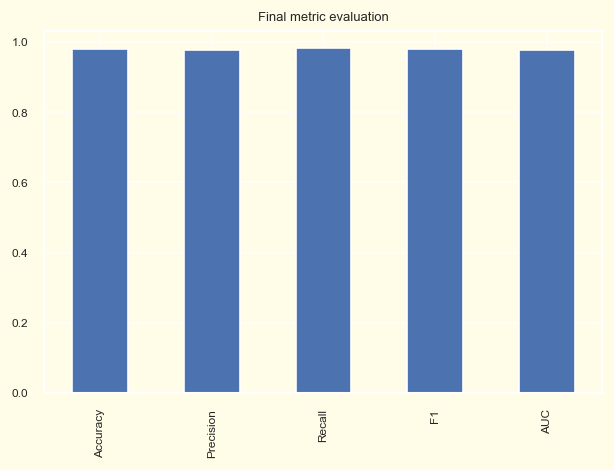

In [43]:
final_metrics={'Accuracy': scv.score(X_test,Y_test),
                   'Precision': precision_score(Y_test,scv_Y_pred),
                   'Recall': recall_score(Y_test,scv_Y_pred),
                   'F1': f1_score(Y_test,scv_Y_pred),
                   'AUC': roc_auc_score(Y_test,scv_Y_pred)}

metrics=pd.DataFrame(final_metrics,index=[0])

metrics.T.plot.bar(title='Final metric evaluation',legend=False);

# Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix of K-Nearest Neighbour')

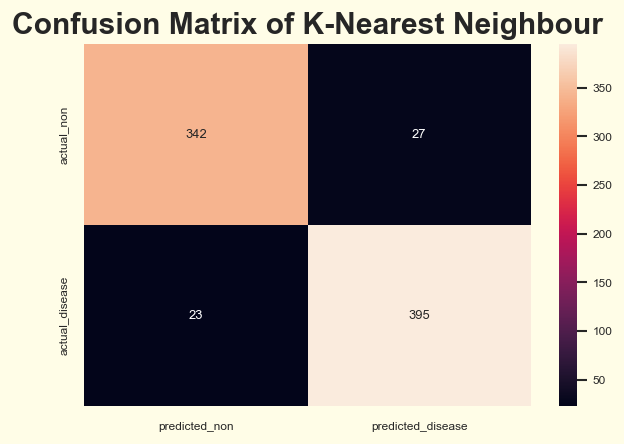

In [44]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots()
ax=sns.heatmap(confusion_matrix(Y_test,Knn_Y_pred),xticklabels=['predicted_non', 'predicted_disease'],yticklabels=['actual_non', 'actual_disease'],fmt='d',annot=True,cbar=True);
ax.set_title('Confusion Matrix of K-Nearest Neighbour',fontdict= { 'fontsize': 18, 'fontweight':'bold'})

Text(0.5, 1.0, 'Confusion Matrix of Random Forest')

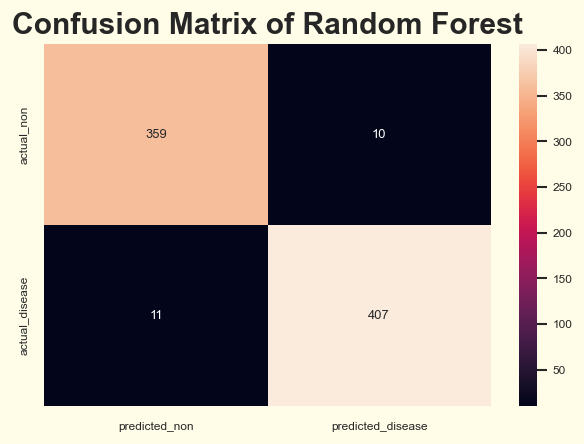

In [45]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots()
ax=sns.heatmap(confusion_matrix(Y_test,RF_Y_pred),xticklabels=['predicted_non', 'predicted_disease'],yticklabels=['actual_non', 'actual_disease'],fmt='d',annot=True,cbar=True);
ax.set_title('Confusion Matrix of Random Forest',fontdict= { 'fontsize': 18, 'fontweight':'bold'})

Text(0.5, 1.0, 'Confusion Matrix of StackingCV')

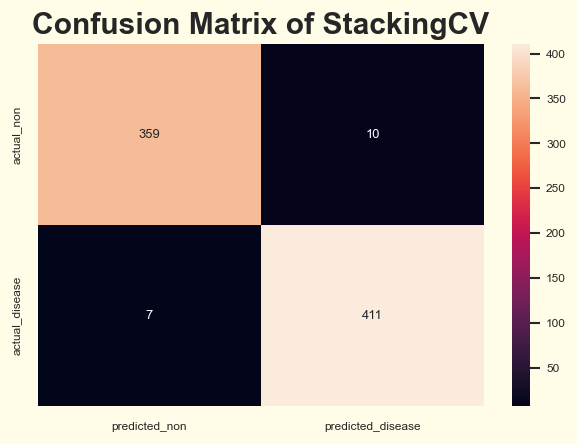

In [46]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots()
ax=sns.heatmap(confusion_matrix(Y_test,scv_Y_pred),xticklabels=['predicted_non', 'predicted_disease'],yticklabels=['actual_non', 'actual_disease'],fmt='d',annot=True,cbar=True);
ax.set_title('Confusion Matrix of StackingCV',fontdict= { 'fontsize': 18, 'fontweight':'bold'})

# Classification Report

In [47]:
from sklearn.metrics import classification_report
print("K-Nearest Neighbour Classification Report")
print(classification_report(Y_test, Knn_Y_pred))
print("\n")
print("Random Forest Classification Report")
print(classification_report(Y_test, RF_Y_pred))
print("\n")
print("StackingCV Classification Report")
print(classification_report(Y_test, scv_Y_pred))
print("\n")

K-Nearest Neighbour Classification Report
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       369
           1       0.94      0.94      0.94       418

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787



Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       369
           1       0.98      0.97      0.97       418

    accuracy                           0.97       787
   macro avg       0.97      0.97      0.97       787
weighted avg       0.97      0.97      0.97       787



StackingCV Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       369
           1       0.98      0.98      0.98       418

    accuracy                           0.98       787
   macro avg 

# ROC Curve

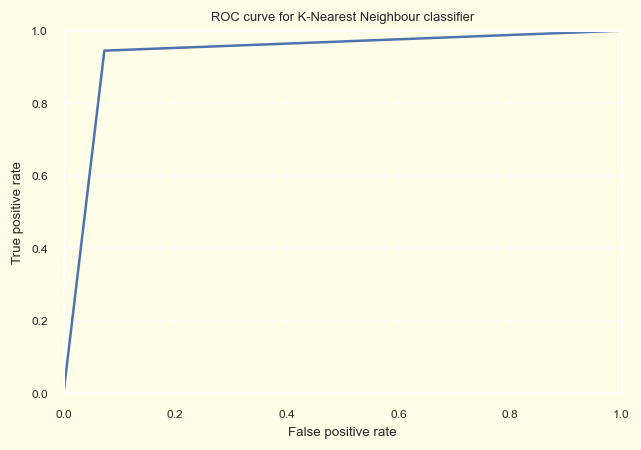

In [48]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Knn_Y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for K-Nearest Neighbour classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid(True)

In [49]:
import sklearn
sklearn.metrics.roc_auc_score(Y_test,Knn_Y_pred)

0.9359026724238535

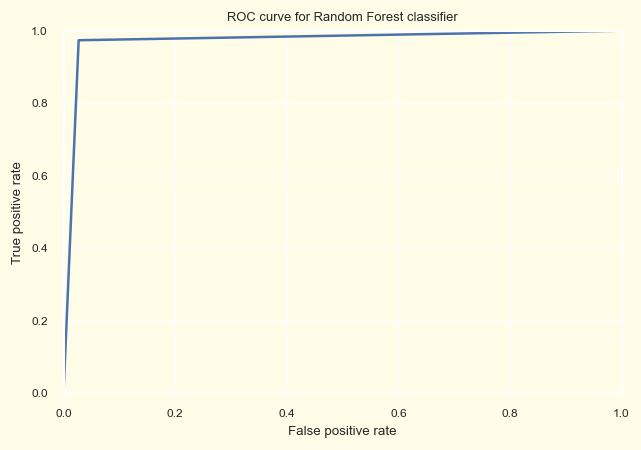

In [50]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, RF_Y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid(True)

In [51]:
sklearn.metrics.roc_auc_score(Y_test,RF_Y_pred)

0.973291969761803

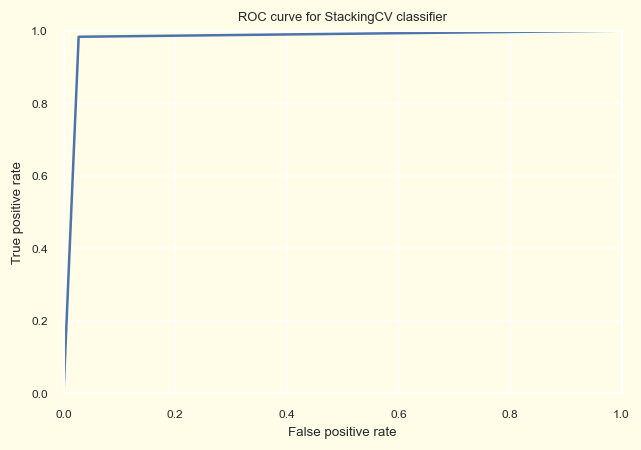

In [52]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, scv_Y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for StackingCV classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid(True)

In [53]:
sklearn.metrics.roc_auc_score(Y_test,scv_Y_pred)

0.9780766587570182

# Test the output

Stacking CV Classifier

In [54]:
print("AGE, SEX, CHESTPAIN, RESTBP, CHOLES, FASTBS, RESTECG, MAXHR, EXAGINA, OLDPEAK, STSLOPE")
user_input=input("Enter the values one by one ")
user_input=user_input.split(",")


for i in range(len(user_input)):
    # convert each item to int type
    user_input[i] = float(user_input[i])

user_input=np.array(user_input)
user_input=user_input.reshape(1,-1)
user_input=scal.transform(user_input) #Test data
scv_Y_pred=scv.predict(user_input)
if(scv_Y_pred[0]==0):
    print("\nYou are healthy and are less likely to get a heart disease!")
else:
    print("\nWarning! You have chances of getting a heart disease!")

AGE, SEX, CHESTPAIN, RESTBP, CHOLES, FASTBS, RESTECG, MAXHR, EXAGINA, OLDPEAK, STSLOPE
Enter the values one by one 62,1,2,130,231,0,1,146,0,1.8,1

Warning! You have chances of getting a heart disease!


Random Forest

In [55]:
print("AGE, SEX, CHESTPAIN, RESTBP, CHOLES, FASTBS, RESTECG, MAXHR, EXAGINA, OLDPEAK, STSLOPE")
user_input=input("Enter the values one by one ")
user_input=user_input.split(",")


for i in range(len(user_input)):
    # convert each item to int type
    user_input[i] = float(user_input[i])

user_input=np.array(user_input)
user_input=user_input.reshape(1,-1)
user_input=scal.transform(user_input) #Test data
RF_Y_pred=RF_clf.predict(user_input)
if(RF_Y_pred[0]==0):
    print("\nYou are healthy and are less likely to get a heart disease!")
else:
    print("\nWarning! You have chances of getting a heart disease!")

AGE, SEX, CHESTPAIN, RESTBP, CHOLES, FASTBS, RESTECG, MAXHR, EXAGINA, OLDPEAK, STSLOPE
Enter the values one by one 62,1,2,130,231,0,1,146,0,1.8,1

Warning! You have chances of getting a heart disease!


# Save the Model

In [56]:
import pickle as pkl

#Save Model

# StackingCV
pkl.dump(scv,open("final_scv_model.p","wb"))

#Random Forest
pkl.dump(RF_clf, open("final_rf_model.p","wb"))

In [57]:
model=pkl.load(open("final_scv_model.p","rb"))
result = model.score(X_test, Y_test)

modelrf=pkl.load(open("final_rf_model.p","rb"))
resultrf = modelrf.score(X_test, Y_test)

model_comp = pd.DataFrame({'Model': ['SCV','Random Forest'], 'Accuracy': [result*100,resultrf*100]})
model_comp

Model   Accuracy
0            SCV  97.839898
1  Random Forest  97.331639

# Frontend with Streamlit

In [58]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

0.24.2


In [59]:
!pip install streamlit
!pip install pyngrok===4.1.1
from pyngrok import ngrok

In [60]:
%%writefile heart-app.py
import streamlit as st
import base64
import sklearn
import numpy as np
import pickle as pkl

#Load the saved model
#SCV
modelscv=pkl.load(open("final_scv_model.p","rb"))
#Random Forest
modelrf=pkl.load(open("final_rf_model.p","rb"))

#Title Page
st.set_page_config(page_title="Heart Disease Prediction App",page_icon="💜",layout="centered",initial_sidebar_state="expanded")

#function
def preprocess(age,sex,chestpain,restbp,choles,fastbs,restecg,maxhr,exagina,oldpeak,stslope,model):   
 
    # Pre-processing user input   
    
    #SEX
    if sex=="Male":
        sex=1 
    else: 
        sex=0
    
    #CHEST PAIN
    if chestpain=="Typical Angina":
        chestpain=0
    elif chestpain=="Atypical Angina":
        chestpain=1
    elif chestpain=="Non-Anginal Pain":
        chestpain=2
    elif chestpain=="Asymptomatic":
        chestpain=3
    
    #EXERCISE AGINE
    if exagina=="Yes":
        exagina=1
    elif exagina=="No":
        exagina=0
 
    #FASTING BLOOD SUGAR
    if fastbs=="Yes":
        fastbs=1
    elif fastbs=="No":
        fastbs=0
 
    #ST SLOPE
    if stslope=="Upsloping: better heart rate with excercise(uncommon)":
        stslope=0
    elif stslope=="Flatsloping: minimal change(typical healthy heart)":
          stslope=1
    elif stslope=="Downsloping: signs of unhealthy heart":
        stslope=2  

    #RESTING ECG
    if restecg=="Nothing to note":
        restecg=0
    elif restecg=="ST-T Wave abnormality":
        restecg=1
    elif restecg=="Possible or definite left ventricular hypertrophy":
        restecg=2

    user_input=[age,sex,chestpain,restbp,choles,fastbs,restecg,maxhr,exagina,oldpeak,stslope]
    user_input=np.array(user_input)
    user_input=user_input.reshape(1,-1)
    
    if (model is '1'):
        prediction = modelscv.predict(user_input)

    if (model is '2'):
        prediction = modelrf.predict(user_input)
    
    return prediction

    

       
    # front end elements of the web page 
html_temp = """ 
    <div style ="background-color:#770010;padding:13px"> 
    <h1 style ="color:white;text-align:center;">Heart ❤️ Disease Prediction</h1> 
    </div> 
    """
    
    # Display front end aspect
st.markdown(html_temp, unsafe_allow_html = True) 
st.subheader('by 👱 Liaw Jing Shiong & Phoon Wen Hao ')
      
      
    # following lines create boxes in which user can enter data required to make prediction
    
original_list = ['1. Stacking CV Classifier', '2. Random Forest Classifier']
result = st.selectbox("Select an Algorithm", original_list)
if (result == "1. Stacking CV Classifier"):
    accurate = 97.84
else:
    accurate = 97.33

st.write(f'Model Selected : {result}')
st.write(f'Model Accuracy : {accurate} %')
    
    # Age (Drop Down)
age=st.selectbox ("Age",range(1,101,1))
    
    # Gender (Radio Button)
sex = st.radio("Select Gender: ", ('Male', 'Female'))
    
    # CHEST PAIN (Drop Down)
chestpain = st.selectbox('Chest Pain Type',("Typical Angina","Atypical Angina","Non-Anginal Pain","Asymptomatic")) 
    
    # RESTING BLOOD PRESSURE (Drop Down)
restbp = st.slider('Resting Blood Pressure',min_value=1,max_value=500,step=1)
    
    #CHOLESTEROL (Drop Down)
choles = st.slider('Serum Cholestoral in mg/dl',min_value=1,max_value=1000,step=1)
    
    # FASTING BLOOD SUGAR (Radio Button)
fastbs = st.radio("Fasting Blood Sugar higher than 120 mg/dl", ['Yes','No'])
    
    # RESTING ECG (Drop Down)
restecg = st.selectbox('Resting Electrocardiographic Results',("Nothing to note","ST-T Wave abnormality","Possible or definite left ventricular hypertrophy"))
    
    # MAXIMUM HEART RATE (Drop Down)
maxhr = st.slider('Maximum Heart Rate Achieved ❤️',min_value=1,max_value=300,step=1)
    
    # EXERCISE ANGINA (Drop Down)
exagina = st.selectbox('Exercise Induced Angina',["Yes","No"])
    
    # OLD PEAK (INPUT BOX)
oldpeak = st.number_input('Oldpeak')
    
    # ST SLOPE (Drop Down)
stslope = st.selectbox('Heart Rate Slope',("Upsloping: better heart rate with excercise(uncommon)","Flatsloping: minimal change(typical healthy heart)","Downsloping: signs of unhealthy heart"))

#user_input=preprocess(sex,cp,exang, fbs, slope, thal )
pred = preprocess(age,sex,chestpain,restbp,choles,fastbs,restecg,maxhr,exagina,oldpeak,stslope,result[0])
    

if st.button("Predict"):
    if pred[0] == 0:
        st.success('You have lower risk of getting a heart disease!')
    else:
        st.error('Warning! You have a high risk of getting a heart disease!')
    
    # FEEDBACK/ About Us
st.sidebar.subheader("About App")

st.sidebar.info("This web app is helps you to find out whether you are at a risk of developing a heart disease.")
st.sidebar.info("Enter the required fields and click on the 'Predict' button to check whether you have a healthy heart")

Overwriting heart-app.py
